<H2>Model complexity and Graid Search</H2>

Too much training can lead to overfitting : the model will perform well on the training dataset but poorly on the test and validation dataset. So there is a sweetspot where we have to stop the training of the model.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
# create a toy dataset
x = np.linspace(-3,3,100)
rng = np.random.RandomState(42)
#print(x)
#sinusoidal function with some normal random noise
y = np.sin(4*x) + x + rng.normal(size=(len(x)))
# this two next lines are equivalent
X = x[:, np.newaxis]
X = x.reshape(len(x), 1)

cv = KFold(n=len(x), shuffle=True)

for n_neighbors in [1,3,5,10,20]:
    print(KNeighborsRegressor(n_neighbors=n_neighbors).get_params().keys())
    scores = cross_val_score(KNeighborsRegressor(n_neighbors=n_neighbors), X, y, cv=cv)
    print("n_neighbors: %d, average score: %f" % (n_neighbors, np.mean(scores)))

dict_keys(['n_jobs', 'metric_params', 'leaf_size', 'p', 'algorithm', 'weights', 'n_neighbors', 'metric'])
n_neighbors: 1, average score: 0.606089
dict_keys(['n_jobs', 'metric_params', 'leaf_size', 'p', 'algorithm', 'weights', 'n_neighbors', 'metric'])
n_neighbors: 3, average score: 0.720450
dict_keys(['n_jobs', 'metric_params', 'leaf_size', 'p', 'algorithm', 'weights', 'n_neighbors', 'metric'])
n_neighbors: 5, average score: 0.714957
dict_keys(['n_jobs', 'metric_params', 'leaf_size', 'p', 'algorithm', 'weights', 'n_neighbors', 'metric'])
n_neighbors: 10, average score: 0.658873
dict_keys(['n_jobs', 'metric_params', 'leaf_size', 'p', 'algorithm', 'weights', 'n_neighbors', 'metric'])
n_neighbors: 20, average score: 0.537352


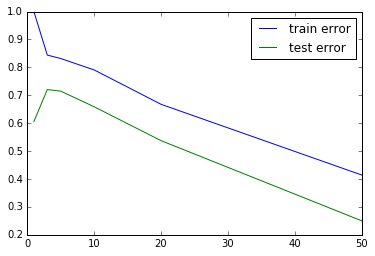

In [3]:
from sklearn.learning_curve import validation_curve
n_neighbors = [1,3,5,10,20, 50]
train_errors, test_errors = validation_curve(KNeighborsRegressor(), X, y, param_name='n_neighbors', param_range=n_neighbors, cv=cv )

plt.plot(n_neighbors, train_errors.mean(axis=1), label="train error")
plt.plot(n_neighbors, test_errors.mean(axis=1), label="test error")
plt.legend(loc='best')

c: 0.001000, gamma: 0.001000, average score: -0.294188
c: 0.001000, gamma: 0.010000, average score: -0.291620
c: 0.001000, gamma: 0.100000, average score: -0.280445
c: 0.001000, gamma: 0.200000, average score: -0.278358
c: 0.001000, gamma: 0.400000, average score: -0.279084
c: 0.001000, gamma: 0.600000, average score: -0.280433
c: 0.001000, gamma: 0.800000, average score: -0.281583
c: 0.001000, gamma: 1.000000, average score: -0.282518
c: 0.010000, gamma: 0.001000, average score: -0.291361
c: 0.010000, gamma: 0.010000, average score: -0.266224
c: 0.010000, gamma: 0.100000, average score: -0.147932
c: 0.010000, gamma: 0.200000, average score: -0.124564
c: 0.010000, gamma: 0.400000, average score: -0.129299
c: 0.010000, gamma: 0.600000, average score: -0.140167
c: 0.010000, gamma: 0.800000, average score: -0.151377
c: 0.010000, gamma: 1.000000, average score: -0.161752
c: 0.100000, gamma: 0.001000, average score: -0.263795
c: 0.100000, gamma: 0.010000, average score: -0.035154
c: 0.10000

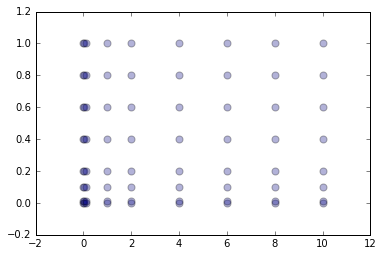

In [4]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.svm import SVR

# each parameter setting do cross-validation
for C in [0.001, 0.01, 0.1, 1, 2, 4, 6, 8, 10]:
    for gamma in [0.001, 0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1]:
        scores = cross_val_score(SVR(C=C, gamma=gamma), X, y, cv= cv)
        print("c: %f, gamma: %f, average score: %f" % (C, gamma, np.mean(scores)))
        plt.scatter(C, gamma, c=np.mean(scores), s=50, alpha=0.3)


In [5]:
# the previous grid search is built in sklearn :
from sklearn.grid_search import GridSearchCV
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=3)
grid.fit(X,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.111315 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.263577 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.507672 -   0.0s
[CV] gamma=0.01, C=0.001 .............................................
[CV] ................... gamma=0.01, C=0.001, score=-0.108379 -   0.0s
[CV] gamma=0.01, C=0.001 .............................................
[CV] ................... gamma=0.01, C=0.001, score=-0.261062 -   0.0s
[CV] gamma=0.01, C=0.001 .............................................
[CV] ................... gamma=0.01, C=0.001, score=-0.505419 -   0.0s
[CV] gamma=0.1, C=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished


GridSearchCV(cv=sklearn.cross_validation.KFold(n=100, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1], 'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [6]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)
grid.predict(X)
print(grid.best_score_)
print(grid.best_params_)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.734051492379
{'gamma': 1, 'C': 10}
0.734051492379
{'gamma': 1, 'C': 10}


In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
cv = KFold(n=len(X_train), n_folds=10, shuffle=True)
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=3)

grid.fit(X_train, y_train)
print(grid.score(X_test, y_test))
print(grid.best_params_)
print('!! This best score is the CROSS VALIDATION score :', grid.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.000587 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.019570 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.316695 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.085429 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.507487 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.090153 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .........

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [18]:
# same with Kneighbors
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
param_grid = {'n_neighbors' : [1, 2, 3, 4, 5, 10, 20, 50]}
gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, verbose=2)
gs.fit(X_train, y_train)
print('test score', gs.score(X_test, y_test))
print('Best params :', gs.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................................... n_neighbors=1 -   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .......................................... n_neighbors=2 -   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s finished
